In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Gene_data\cleaned_dataset_Gene.csv")

In [3]:
df

,Gene_One,Gene_Two,Cancer_Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2133,5.0,6.5,1
2134,3.4,6.6,0
2135,2.7,6.5,0
2136,3.3,5.6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene_One        2138 non-null   float64
 1   Gene_Two        2138 non-null   float64
 2   Cancer_Present  2138 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 50.2 KB


# EDA : FOR UNDERSTANDING PURPOSE ONLY

<Axes: xlabel='Gene_One', ylabel='Gene_Two'>

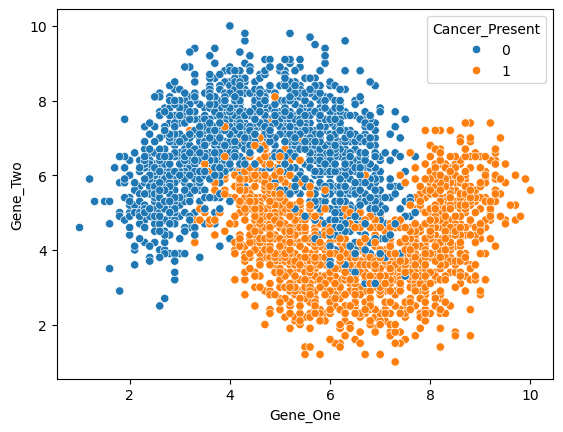

In [5]:
sns.scatterplot(x= 'Gene_One', y = 'Gene_Two', hue = 'Cancer_Present', data =df)

# X and y

In [6]:
X = df.drop(columns = ['Cancer_Present'])
y = df['Cancer_Present']

# Train_Test_Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Support Vector Machine(SVM)

**With default parameters**

In [8]:
# Modelling 
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

# prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))


0.9169590643274854
0.9135514018691588


# HyperParameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'C' : [1.0, 10], "kernel" : ['linear', 'rbf', 'sigmoid', 'poly']}

grid = GridSearchCV(estimator, param_grid, cv = 5)

grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [10]:
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

# Rebuild SVM with best Parameter

In [11]:
model = SVC(kernel = 'rbf', C = 10)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))


0.9169590643274854
0.9158878504672897
